In [1]:
%matplotlib inline

In [15]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats

import statsmodels.api as sm

In [16]:
# Import our data into pandas from CSV
#BCH data make new df with only close and date columns and rename close column to BCH
bch_raw = 'Cryptos - YF/BCH-USD.csv'
bch_df = pd.read_csv(bch_raw, low_memory=False)
bch = bch_df[["Date", "Close"]]
clean_bch= bch.rename(columns={"Close": "BCH_Close"})
clean_bch["BCH_PC"] = clean_bch["BCH_Close"].pct_change()

#BNB follow same process as above
bnb_raw = 'Cryptos - YF/BNB-USD.csv'
bnb_df = pd.read_csv(bnb_raw, low_memory=False)
bnb = bnb_df[["Date", "Close"]]
clean_bnb= bnb.rename(columns={"Close": "BNB_Close"})
clean_bnb["BNB_PC"] = clean_bnb["BNB_Close"].pct_change()


#BTC follow same process as above
btc_raw = 'Cryptos - YF/BTC-USD.csv'
btc_df = pd.read_csv(btc_raw, low_memory=False)
btc = btc_df[["Date", "Close"]]
clean_btc= btc.rename(columns={"Close": "BTC_Close"})
clean_btc["BTC_PC"] = clean_btc["BTC_Close"].pct_change()

#EOS follow same process as above
eos_raw = 'Cryptos - YF/EOS-USD.csv'
eos_df = pd.read_csv(eos_raw, low_memory=False)
eos = eos_df[["Date", "Close"]]
clean_eos= eos.rename(columns={"Close": "EOS_Close"})
clean_eos["EOS_PC"] = clean_eos["EOS_Close"].pct_change()


#ETH follow same process as above
eth_raw = 'Cryptos - YF/ETH-USD.csv'
eth_df = pd.read_csv(eth_raw, low_memory=False)
eth = eth_df[["Date", "Close"]]
clean_eth= eth.rename(columns={"Close": "ETH_Close"})
clean_eth["ETH_PC"] = clean_eth["ETH_Close"].pct_change()

#LINK follow same process as above
link_raw = 'Cryptos - YF/LINK-USD.csv'
link_df = pd.read_csv(link_raw, low_memory=False)
link = link_df[["Date", "Close"]]
clean_link= link.rename(columns={"Close": "LINK_Close"})
clean_link["LINK_PC"] = clean_link["LINK_Close"].pct_change()

#LTC follow same process as above
ltc_raw = 'Cryptos - YF/LTC-USD.csv'
ltc_df = pd.read_csv(ltc_raw, low_memory=False)
ltc = ltc_df[["Date", "Close"]]
clean_ltc= ltc.rename(columns={"Close": "LTC_Close"})
clean_ltc["LTC_PC"] = clean_ltc["LTC_Close"].pct_change()

#TRX follow same process as above
trx_raw = 'Cryptos - YF/TRX-USD.csv'
trx_df = pd.read_csv(trx_raw, low_memory=False)
trx = trx_df[["Date", "Close"]]
clean_trx= trx.rename(columns={"Close": "TRX_Close"})
clean_trx["TRX_PC"] = clean_trx["TRX_Close"].pct_change()

#XLM follow same process as above
xlm_raw = 'Cryptos - YF/XLM-USD.csv'
xlm_df = pd.read_csv(xlm_raw, low_memory=False)
xlm = xlm_df[["Date", "Close"]]
clean_xlm= xlm.rename(columns={"Close": "XLM_Close"})
clean_xlm["XLM_PC"] = clean_xlm["XLM_Close"].pct_change()

#XRP follow same process as above
xrp_raw = 'Cryptos - YF/XRP-USD.csv'
xrp_df = pd.read_csv(xrp_raw, low_memory=False)
xrp = xrp_df[["Date", "Close"]]
clean_xrp= xrp.rename(columns={"Close": "XRP_Close"})
clean_xrp["XRP_PC"] = clean_xrp["XRP_Close"].pct_change()

#merge all clean df's into one big df
BCH_BNB= pd.merge(clean_bch, clean_bnb, how ="inner", on= "Date")
BTC_EOS= pd.merge(clean_btc, clean_eos, how ="inner", on= "Date")
ETH_LINK= pd.merge(clean_eth, clean_link, how ="inner", on= "Date")
LTC_TRX= pd.merge(clean_ltc, clean_trx, how ="inner", on= "Date")
XLM_XRP= pd.merge(clean_xlm, clean_xrp, how ="inner", on= "Date")

BCH_EOS= pd.merge(BCH_BNB, BTC_EOS, how ="inner", on= "Date")
ETH_TRX=pd.merge(ETH_LINK, LTC_TRX, how ="inner", on= "Date")
BCH_TRX=pd.merge(BCH_EOS, ETH_TRX, how="inner", on= "Date")

Yahoo_Combined= pd.merge(BCH_TRX, XLM_XRP, how="inner", on="Date")

Yahoo_Combined.head()

,Date,BCH_Close,BCH_PC,BNB_Close,BNB_PC,BTC_Close,BTC_PC,EOS_Close,EOS_PC,ETH_Close,...,LINK_Close,LINK_PC,LTC_Close,LTC_PC,TRX_Close,TRX_PC,XLM_Close,XLM_PC,XRP_Close,XRP_PC
0,2017-09-21,416.130005,-0.128067,0.7018,-0.096084,3617.270020,-0.068233,0.5671,-0.080279,257.769989,...,0.1727,NaN,46.459999,-0.098914,0.002075,-0.237693,0.01057,-0.140650,0.1710,-0.058888
1,2017-09-22,409.630005,-0.015620,0.7158,0.019949,3600.830078,-0.004545,0.5659,-0.002116,262.940002,...,0.1578,-0.086277,47.669998,0.026044,0.002077,0.000964,0.01077,0.018921,0.1728,0.010526
2,2017-09-23,430.309998,0.050485,0.7716,0.077955,3788.020020,0.051985,0.5780,0.021382,286.140015,...,0.1335,-0.153992,49.290001,0.033984,0.002346,0.129514,0.01190,0.104921,0.1791,0.036458
3,2017-09-24,421.190002,-0.021194,0.7848,0.017107,3667.520020,-0.031811,0.5454,-0.056401,282.600006,...,0.1696,0.270412,47.500000,-0.036316,0.002247,-0.042199,0.01157,-0.027731,0.1757,-0.018984
4,2017-09-25,450.850006,0.070420,0.9262,0.180173,3932.830078,0.072340,0.5688,0.042904,294.890015,...,0.1784,0.051887,52.270000,0.100421,0.001740,-0.225634,0.01204,0.040622,0.1846,0.050655


In [17]:
Yahoo_Combined = Yahoo_Combined.drop([0], axis=0)
Yahoo_Combined.head()

,Date,BCH_Close,BCH_PC,BNB_Close,BNB_PC,BTC_Close,BTC_PC,EOS_Close,EOS_PC,ETH_Close,...,LINK_Close,LINK_PC,LTC_Close,LTC_PC,TRX_Close,TRX_PC,XLM_Close,XLM_PC,XRP_Close,XRP_PC
1,2017-09-22,409.630005,-0.015620,0.7158,0.019949,3600.830078,-0.004545,0.5659,-0.002116,262.940002,...,0.1578,-0.086277,47.669998,0.026044,0.002077,0.000964,0.01077,0.018921,0.1728,0.010526
2,2017-09-23,430.309998,0.050485,0.7716,0.077955,3788.020020,0.051985,0.5780,0.021382,286.140015,...,0.1335,-0.153992,49.290001,0.033984,0.002346,0.129514,0.01190,0.104921,0.1791,0.036458
3,2017-09-24,421.190002,-0.021194,0.7848,0.017107,3667.520020,-0.031811,0.5454,-0.056401,282.600006,...,0.1696,0.270412,47.500000,-0.036316,0.002247,-0.042199,0.01157,-0.027731,0.1757,-0.018984
4,2017-09-25,450.850006,0.070420,0.9262,0.180173,3932.830078,0.072340,0.5688,0.042904,294.890015,...,0.1784,0.051887,52.270000,0.100421,0.001740,-0.225634,0.01204,0.040622,0.1846,0.050655
5,2017-09-26,449.559998,-0.002861,0.8642,-0.066940,3892.699951,-0.010204,0.5614,-0.013010,288.640015,...,0.1951,0.093610,52.270000,0.000000,0.001876,0.078161,0.01236,0.026578,0.1892,0.024919


In [18]:
Yahoo_Combined.replace([np.inf,-np.inf], np.nan,inplace=True)
Yahoo_Combined=Yahoo_Combined.fillna(0)

Yahoo_Combined.head()

,Date,BCH_Close,BCH_PC,BNB_Close,BNB_PC,BTC_Close,BTC_PC,EOS_Close,EOS_PC,ETH_Close,...,LINK_Close,LINK_PC,LTC_Close,LTC_PC,TRX_Close,TRX_PC,XLM_Close,XLM_PC,XRP_Close,XRP_PC
1,2017-09-22,409.630005,-0.015620,0.7158,0.019949,3600.830078,-0.004545,0.5659,-0.002116,262.940002,...,0.1578,-0.086277,47.669998,0.026044,0.002077,0.000964,0.01077,0.018921,0.1728,0.010526
2,2017-09-23,430.309998,0.050485,0.7716,0.077955,3788.020020,0.051985,0.5780,0.021382,286.140015,...,0.1335,-0.153992,49.290001,0.033984,0.002346,0.129514,0.01190,0.104921,0.1791,0.036458
3,2017-09-24,421.190002,-0.021194,0.7848,0.017107,3667.520020,-0.031811,0.5454,-0.056401,282.600006,...,0.1696,0.270412,47.500000,-0.036316,0.002247,-0.042199,0.01157,-0.027731,0.1757,-0.018984
4,2017-09-25,450.850006,0.070420,0.9262,0.180173,3932.830078,0.072340,0.5688,0.042904,294.890015,...,0.1784,0.051887,52.270000,0.100421,0.001740,-0.225634,0.01204,0.040622,0.1846,0.050655
5,2017-09-26,449.559998,-0.002861,0.8642,-0.066940,3892.699951,-0.010204,0.5614,-0.013010,288.640015,...,0.1951,0.093610,52.270000,0.000000,0.001876,0.078161,0.01236,0.026578,0.1892,0.024919


In [19]:
group1 = Yahoo_Combined["BTC_PC"]
group2 = Yahoo_Combined["BNB_PC"]
group3 = Yahoo_Combined["BCH_PC"]
group4 = Yahoo_Combined["EOS_PC"]
group5 = Yahoo_Combined["ETH_PC"]
group6 = Yahoo_Combined["LINK_PC"]
group7 = Yahoo_Combined["LTC_PC"]
group8 = Yahoo_Combined["TRX_PC"]
group9 = Yahoo_Combined["XLM_PC"]
group10 = Yahoo_Combined["XRP_PC"]

gp_ls = [group2, group3, group4, group5, group6, group7, group8, group9, group10 ]

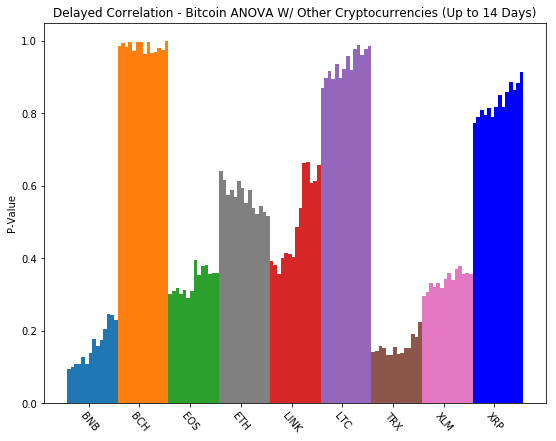

,BNB,BCH,EOS,ETH,LINK,LTC,TRX,XLM,XRP
0,0.094264,0.985444,0.302592,0.639421,0.391126,0.869425,0.141870,0.296537,0.772896
1,0.099755,0.994607,0.310589,0.614846,0.382521,0.896045,0.145390,0.307939,0.790616
2,0.108351,0.983209,0.318072,0.574958,0.355968,0.915395,0.157360,0.330793,0.808085
3,0.107914,0.997445,0.302403,0.587617,0.401270,0.892998,0.151863,0.321146,0.794571
4,0.126341,0.970652,0.312785,0.567562,0.413536,0.935684,0.133548,0.330941,0.814746
5,0.108907,0.995979,0.290869,0.611703,0.412336,0.897857,0.131870,0.316887,0.790459
6,0.137736,0.997145,0.308891,0.594212,0.403545,0.920933,0.154909,0.343423,0.817141
7,0.177968,0.963208,0.394046,0.552687,0.484680,0.958478,0.135604,0.358938,0.849015
8,0.158534,0.997210,0.352639,0.588605,0.538176,0.918671,0.139512,0.339377,0.818188
9,0.173772,0.966538,0.379020,0.537061,0.662017,0.977917,0.151841,0.371056,0.858094


In [48]:
#Hypothesis Addition, if other cryptos correlate to bitcoin in pattern the change may be delayed, one day, two days, 
# three days, etc... Up to two weeks. Rationale, after two weeks any correlation thereafter is likely no longer market 
#forces. but rather investor influence. If hypothesis is correct, then p-values should drop to below .05 forming a 
# discernible parabola/"V"-shape in bar charts

delay = np.arange(14)
length = len(group1)
Output = pd.DataFrame({})
R2_df = pd.DataFrame({})

names = ["BNB", "BCH", "EOS", "ETH", "LINK", "LTC", "TRX", "XLM", "XRP"]
n = 0
maxi = 0

adj = len(group1)

plt.figure(figsize=(9,7))
group1_og = group1.copy()



for x in gp_ls:
    group1 = group1_og
    ls = []
    R2_ls = []
    for i in delay:
        btc = group1.drop(group1.index[adj-i : adj])
        other = x.drop(x.index[0:i])
        anova = stats.f_oneway(btc, other)

        
        btc_ols = btc.tolist()
        other_ols = other.tolist()
        x_OLS = sm.add_constant(btc_ols)
        model = sm.OLS(btc_ols,other_ols)
        OLS_res= model.fit()
        R2_ls.append(OLS_res.rsquared)
        
        ls.append(anova[1])
    
    R2_df[names[n]] = R2_ls
    Output[names[n]] = ls
    
    n += 1

    x_axis = [(x + maxi + 1) for x in delay]
    
    y_axis = ls
    
    if names[n-1] == "ETH":
        plt.bar(x_axis, y_axis, align = "center", width = 1, color = "grey")
    elif names[n-1] == "XRP":
        plt.bar(x_axis, y_axis, align = "center", width = 1, color = "blue")
    else:
        plt.bar(x_axis, y_axis, align = "center", width = 1,)
    maxi = max(x_axis)

plt.xticks(np.arange(start = max(delay)/2, stop = max(x_axis), step = max(delay)+1), names, rotation = -50)
plt.ylabel("P-Value")
plt.title(f"Delayed Correlation - Bitcoin ANOVA W/ Other Cryptocurrencies (Up to {max(delay)+1} Days)")

plt.savefig("Images/Delayed.png")
plt.show()

Output

In [58]:
R2_df

,BNB,BCH,EOS,ETH,LINK,LTC,TRX,XLM,XRP
0,0.283827,0.280351,0.330309,0.490248,0.124499,0.438695,0.175919,0.221370,0.192723
1,0.000128,0.002677,0.000116,0.001934,0.005102,0.000017,0.001176,0.000033,0.002091
2,0.004741,0.009559,0.000135,0.006492,0.008648,0.004555,0.028304,0.001338,0.001837
3,0.000673,0.002020,0.003406,0.002006,0.003039,0.000126,0.000445,0.002638,0.007042
4,0.002561,0.000003,0.009468,0.000888,0.003073,0.000275,0.000998,0.000134,0.004228
5,0.005470,0.005623,0.003824,0.017989,0.002695,0.021290,0.010152,0.008284,0.001365
6,0.000035,0.000029,0.001737,0.004282,0.000893,0.008033,0.002946,0.000229,0.005898
7,0.007546,0.001340,0.001735,0.000534,0.001178,0.000444,0.008088,0.001426,0.002965
8,0.000987,0.009925,0.004900,0.000549,0.001591,0.004936,0.000090,0.003550,0.006738
9,0.000168,0.002056,0.003181,0.000528,0.000269,0.006387,0.009315,0.000034,0.004329


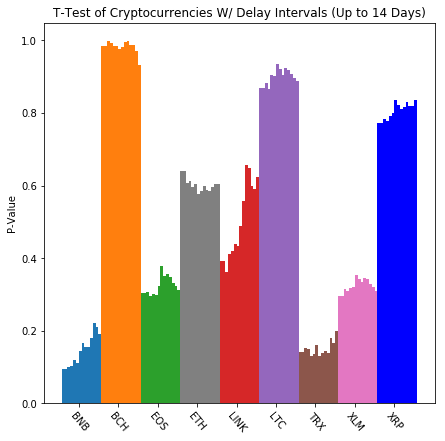

,BNB,BCH,EOS,ETH,LINK,LTC,TRX,XLM,XRP
0,0.094317,0.985444,0.302644,0.639424,0.391194,0.869428,0.142007,0.296599,0.772907
1,0.094317,0.985444,0.302644,0.639424,0.391194,0.869428,0.142007,0.296599,0.772907
2,0.100705,0.998582,0.306158,0.605743,0.360754,0.881451,0.152110,0.315183,0.784016
3,0.101899,0.993496,0.294350,0.611228,0.410083,0.866399,0.148252,0.309250,0.776793
4,0.118071,0.983854,0.301942,0.595294,0.419855,0.904021,0.129282,0.316272,0.792629
5,0.110714,0.985657,0.298724,0.604088,0.438255,0.902982,0.134872,0.320716,0.799999
6,0.142975,0.975671,0.322302,0.576570,0.434505,0.936349,0.160567,0.352738,0.835630
7,0.165904,0.980828,0.379057,0.586004,0.489130,0.921666,0.130505,0.341371,0.822467
8,0.155225,0.994518,0.351749,0.599465,0.557290,0.905642,0.139072,0.334369,0.812213
9,0.156363,0.998864,0.354931,0.586904,0.655725,0.923854,0.142762,0.344363,0.816752


In [8]:
# Similar theory to prior anova tests, with t-test 

Output2 = pd.DataFrame({})
n = 0

plt.figure(figsize=(7,7))
x_axis = 0
maxi = 0

for x in gp_ls:
    group1 = group1
    ls = []
    for i in delay:
        neg = -i
        btc = group1.drop(group1.index[-1:neg])
        other = x.drop(x.index[1:i])
        ttest = stats.ttest_ind(btc, other, equal_var=False)
                
        ls.append(ttest[1])
    Output2[names[n]] = ls
    
    n += 1

    x_axis = [(x + maxi + 1) for x in delay]
    y_axis = ls
    
    if names[n-1] == "ETH":
        plt.bar(x_axis, y_axis, align = "center", width = 1, color = "grey")
    elif names[n-1] == "XRP":
        plt.bar(x_axis, y_axis, align = "center", width = 1, color = "blue")
    else:
        plt.bar(x_axis, y_axis, align = "center", width = 1,)
    maxi = max(x_axis) 
    
plt.xticks(np.arange(start = max(delay)/2, stop = max(x_axis), step = max(delay)+1), names, rotation = -50)
plt.ylabel("P-Value")
plt.title(f"T-Test of Cryptocurrencies W/ Delay Intervals (Up to {max(delay)+1} Days)")

plt.show()

Output2

In [50]:
#Hypothesis Addition2: Due to differences of characteristics of normals use between Cryptos (e.g. transferral and 
# usage fees) when Bitcoin and others are operating at normal functions, they varies to widely to correlate 
# under normal circumstances but if Bitcoin faulters, then other cryptos faulter too, experiencing a correlating decline. 

Down_df = Yahoo_Combined[["Date","BTC_PC","BNB_PC","BCH_PC","EOS_PC","ETH_PC",\
                          "LINK_PC","LTC_PC","TRX_PC","XLM_PC","XRP_PC"]]

R2_df2 = pd.DataFrame({})
days = 14
ls = []
r2 = Down_df.index.size

for i in range(r2):
    a = (r2 - i - days)
    b = r2-i
    x = Down_df["BTC_PC"].iloc[a : b].mean()
    ls.append(x)

ls = list(reversed(ls))
Down_df["BTC_rmn"] = ls
df = pd.DataFrame({})

Output3 = pd.DataFrame({})

ls2 = ["BNB_PC","BCH_PC","EOS_PC","ETH_PC","LINK_PC","LTC_PC","TRX_PC","XLM_PC","XRP_PC"]
names2 = ["Date","BTC_PC","BNB_PC","BCH_PC","EOS_PC","ETH_PC",\
                          "LINK_PC","LTC_PC","TRX_PC","XLM_PC","XRP_PC", "BTC_rmn"]

Down_df = Down_df.loc[Down_df["BTC_rmn"] <= 0]

n = 0

for x in ls2:
    ls = []
    r2d2_ls = []
    anova = stats.f_oneway(Down_df["BTC_PC"], Down_df[x])
    ls.append(anova[1])
    Output3[ls2[n]] = ls
    
    btc = Down_df["BTC_PC"]
    other = Down_df[x]
    btc_ols = btc.tolist()
    other_ols = other.tolist()
    x_OLS = sm.add_constant(btc_ols)
    model = sm.OLS(btc_ols,other_ols)
    OLS_res= model.fit()
    r2d2_ls.append(OLS_res.rsquared)
    R2_df2[names[n]] = r2d2_ls
    
    n += 1
    
    
Output3

,BNB_PC,BCH_PC,EOS_PC,ETH_PC,LINK_PC,LTC_PC,TRX_PC,XLM_PC,XRP_PC
0,0.074817,0.153879,0.589731,0.900593,0.373263,0.839387,0.438747,0.371565,0.294368


In [51]:
R2_df2

,BNB,BCH,EOS,ETH,LINK,LTC,TRX,XLM,XRP
0,0.489812,0.694295,0.554736,0.732324,0.390823,0.734198,0.42927,0.422714,0.32721


In [10]:
#If downside p-values are significant,then supposedly upside p-values should be less so. 
#Thus, aiding to confirm that Bitcoin has a lynchpin downward effects on other cryptos.

Up_df = Yahoo_Combined[["Date","BTC_PC","BNB_PC","BCH_PC","EOS_PC","ETH_PC",\
                          "LINK_PC","LTC_PC","TRX_PC","XLM_PC","XRP_PC"]]

Norm = Yahoo_Combined[["Date","BTC_PC","BNB_PC","BCH_PC","EOS_PC","ETH_PC",\
                          "LINK_PC","LTC_PC","TRX_PC","XLM_PC","XRP_PC"]]

days = 7
ls = []
r2 = Up_df.index.size

for i in range(r2):
    a = (r2 - i - days)
    b = r2-i
    x = Up_df["BTC_PC"].iloc[a : b].mean()
    ls.append(x)

ls = list(reversed(ls))
Up_df["BTC_rmn"] = ls
df = pd.DataFrame({})

Output4 = pd.DataFrame({})
Output5 = pd.DataFrame({})

Up_df = Up_df.loc[Up_df["BTC_rmn"] >= 0]

n = 0
for x in ls2:
    ls = []
    anova = stats.f_oneway(Up_df["BTC_PC"], Up_df[x])
    ls.append(anova[1])
    Output4[ls2[n]] = ls
    
    n += 1

#Use normal p-value for comparisons
#Commented out, makes charts too busy.
# n = 0
# for x in ls2:
#     ls = []
#     anova = stats.f_oneway(Norm["BTC_PC"], Norm[x])
#     ls.append(anova[1])
#     Output5[ls2[n]] = ls
    
#     n += 1
    
    
Output4
Output3.loc[1] = Output4.loc[0]
# Output3.loc[2] = Output5.loc[0]
Output3

,BNB_PC,BCH_PC,EOS_PC,ETH_PC,LINK_PC,LTC_PC,TRX_PC,XLM_PC,XRP_PC
0,0.074817,0.153879,0.589731,0.900593,0.373263,0.839387,0.438747,0.371565,0.294368
1,0.361707,0.497355,0.264393,0.867347,0.522454,0.695515,0.124763,0.227548,0.743282


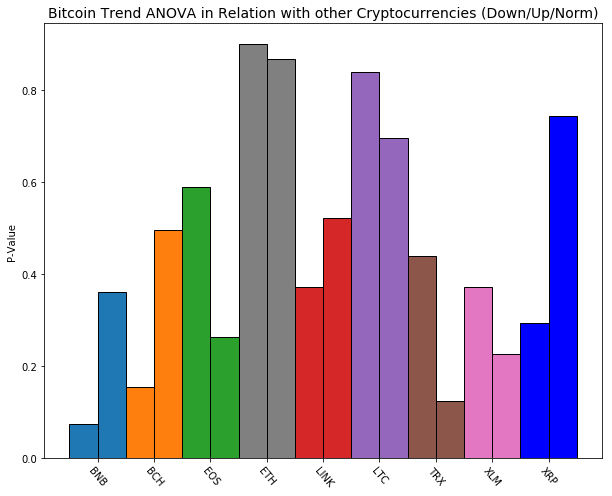

In [11]:
#Plot p-value relating to respective cryptos for both down and up trends.

n = 0
n2 = 0

plt.figure(figsize=(10,8))

for i in Output3.columns:
    n += 2
    x_axis = np.arange(start = n2, stop = n)
    y_axis = Output3[i]
    
    if i == "ETH_PC":
        plt.bar(x_axis, y_axis, align = "center", width = 1, color = "grey", edgecolor= "black")
    elif i == "XRP_PC":
        plt.bar(x_axis, y_axis, align = "center", width = 1, color = "blue", edgecolor= "black")
    else:
        plt.bar(x_axis, y_axis, align = "center", width = 1,edgecolor= "black")
    n2 = n


plt.xticks(np.arange(start = .5, stop = max(x_axis), step = 2), names, rotation = -50)
plt.ylabel("P-Value")
plt.title(f"Bitcoin Trend ANOVA in Relation with other Cryptocurrencies (Down/Up/Norm)", size = 14)

plt.savefig("Images/Trend.png")

plt.show()




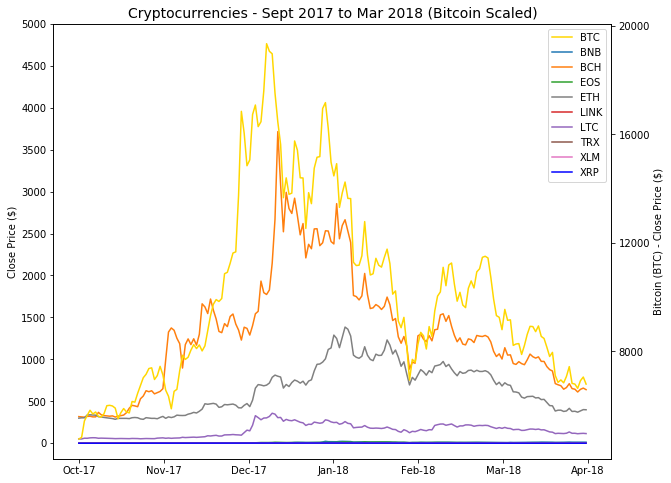

In [12]:
#Demostrate why we thought there might be downward correlating trends between Cryptos,
#Presentation Visualization

Crash_17 = Yahoo_Combined[["Date","BTC_Close","BNB_Close","BCH_Close","EOS_Close","ETH_Close",\
                          "LINK_Close","LTC_Close","TRX_Close","XLM_Close","XRP_Close"]]

names3 = ["BTC","BNB", "BCH", "EOS", "ETH", "LINK", "LTC", "TRX", "XLM", "XRP"]

Crash_17 = Crash_17.loc[Crash_17["Date"] >= "2017-10-1"]
Crash_17 = Crash_17.loc[Crash_17["Date"] <= "2018-04-1"].reset_index()
del Crash_17["index"]
mini = min(Crash_17["Date"])
maxi = max(Crash_17["Date"])



plt.figure(figsize=(10,8))

x_axis = 0
y_axis = 0

x_axis = Crash_17["Date"].unique()
Columns = (Crash_17.columns).tolist()
Columns.pop(0)


i = 0 

for x in Columns:
    y_axis = Crash_17[x]
    sym = names3[i]
    if x == "BTC_Close":
        plt.plot(0,0,label = sym, color = "gold")
    elif x == "ETH_Close":
        plt.plot(x_axis, y_axis, label = sym, color = "grey")

    elif x == "XRP_Close":
        plt.plot(x_axis, y_axis, label = sym, color = "blue")

    else:
        plt.plot(x_axis, y_axis, label = sym)
        
    i += 1
    
plt.legend(loc="best")

size = (Crash_17.index.size)
date_ls = ["Oct-17","Nov-17","Dec-17","Jan-18","Feb-18","Mar-18","Apr-18"]

plt.yticks(np.arange(start = 0, stop = 5500, step = 500))
plt.ylabel("Close Price ($)")

plt.twinx()

plt.xticks(np.arange(start = 0, stop = size, step = size/6.01), date_ls)
plt.yticks(np.arange(start = 0, stop = 24000, step = 4000))

y_axis = Crash_17["BTC_Close"]
plt.plot(x_axis, y_axis, label = "BTC", color = "gold")

plt.ylabel("Bitcoin (BTC) - Close Price ($)")
plt.title(f"Cryptocurrencies - Sept 2017 to Mar 2018 (Bitcoin Scaled)", size = 14)

plt.savefig("Images/2017Crash.png")
# Crash_18
plt.show()

In [13]:
Crash_17.head()

,Date,BTC_Close,BNB_Close,BCH_Close,EOS_Close,ETH_Close,LINK_Close,LTC_Close,TRX_Close,XLM_Close,XRP_Close
0,2017-10-10,4763.359863,1.408,317.190002,0.5520,298.459991,0.4110,50.580002,0.00255,0.01880,0.2582
1,2017-10-11,4824.200195,1.442,314.209991,0.6076,302.859985,0.4491,50.790001,0.00250,0.01955,0.2632
2,2017-10-12,5432.620117,1.352,310.559998,0.5947,302.890015,0.4416,59.720001,0.00180,0.01794,0.2464
3,2017-10-13,5637.259766,1.453,320.109985,0.5872,336.829987,0.4335,59.049999,0.00201,0.01786,0.2602
4,2017-10-14,5824.709961,1.541,321.670013,0.5836,338.809998,0.3896,63.939999,0.00274,0.01750,0.2556
